In [52]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [87]:
# Loading data

data = (np.loadtxt("houses.txt", delimiter=","))
print("Sample Data")
print ("Sq.ft  |Rooms| Price")
for c1, c2, c3 in data[1:10]:
    print "%s | %s | %s" % (c1, c2, c3)

Sample Data
Sq.ft  |Rooms| Price
1600.0 | 3.0 | 329900.0
2400.0 | 3.0 | 369000.0
1416.0 | 2.0 | 232000.0
3000.0 | 4.0 | 539900.0
1985.0 | 4.0 | 299900.0
1534.0 | 3.0 | 314900.0
1427.0 | 3.0 | 198999.0
1380.0 | 3.0 | 212000.0
1494.0 | 3.0 | 242500.0


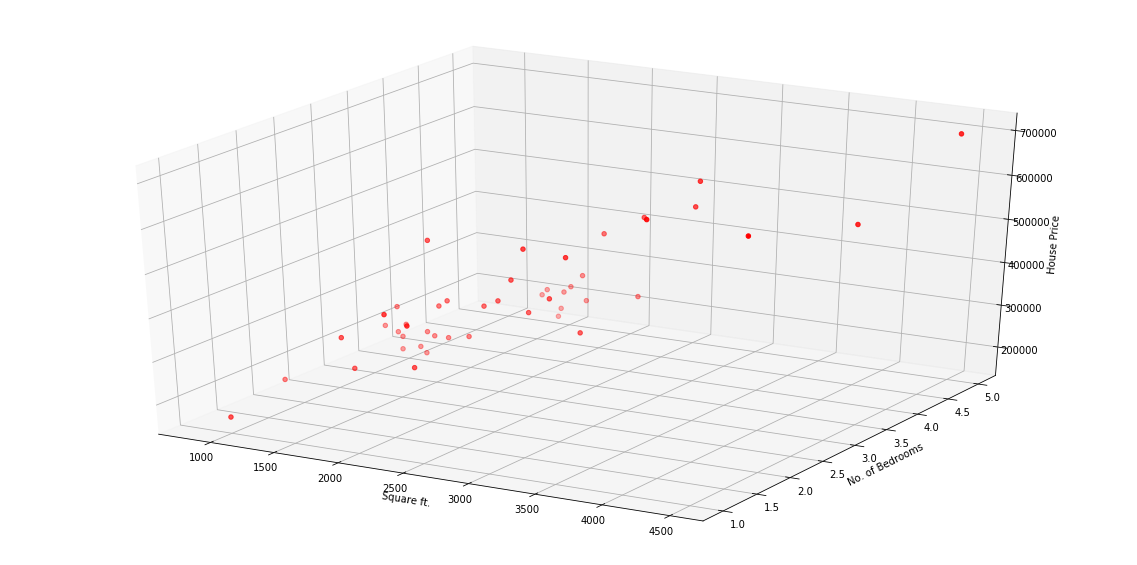

In [106]:
# Visualizing data on 3-D plot

plotdata = data.transpose()
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(plotdata[0], plotdata[1], plotdata[2], c='r', marker='o')
ax.set_xlabel('Square ft.')
ax.set_ylabel('No. of Bedrooms')
ax.set_zlabel('House Price')
plt.show()

In [89]:
# Preprocessing data (Splitting into train and test sets)

ones = np.ones((1, 37)) 
x_train = (np.concatenate((ones, (data[:37,:2]).transpose()), axis=0)) # 3x37 Matrix : ones, sq.ft & no. of bedrooms
y_train = (data[:37,2:3]).transpose() # 1x37 Matrix : House prices
x_test = np.concatenate((np.ones((1, 10)), data[37:,:2].transpose()), axis=0)    # 10x2 Matrix : sq.ft & no. of bedrooms
y_test = data[37:,2:3]    # 37x1 Matrix : House prices

w = [0,0,0] # 3 Initializing weights

In [90]:
m = 37 # no. of train samples
lr = 0.00000001 # learning rate
itr = 10000 # iterations
lossdata = [] # loss at every iteration

# Calculates Yi - Yi hat
def calYi_yihat():
        yi_yihat = y_train - np.matmul(w, x_train) 
        return yi_yihat
    
# Loss Function
def loss(z):
    l = (np.sum(np.square(z)))/(2*m)
    return l

# Regression Model
for i in range(itr):
    z = calYi_yihat()
    lossdata.append(loss(z))
    w[0] = w[0] + (lr/m) * z.sum()
    w[1] = w[1] + (lr/m) * (np.multiply(z,x_train[1])).sum()
    w[2] = w[2] + (lr/m) * (np.multiply(z,x_train[2])).sum()

print("Final weights = {}".format(w))

Final weights = [0.6112004973868039, 170.24324016689596, 1.3369235114128564]


In [108]:
predictions = np.matmul(w, x_test)

In [115]:
print("Desired   | Predicted")
for i in range(10):
    print("{} | {}".format(y_test[i], predictions[i]))

Desired   | Predicted
[345000.] | 362964.54693
[549000.] | 717581.216198
[287000.] | 368071.844135
[368500.] | 283288.036685
[329900.] | 381008.993465
[314000.] | 437020.356403
[299000.] | 204296.510171
[179900.] | 145050.52567
[299900.] | 315296.439684
[239500.] | 204807.239892


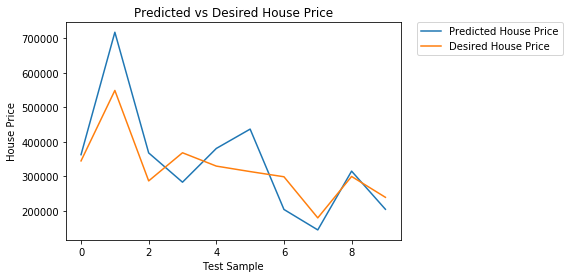

In [117]:
fig, ax = plt.subplots()
ax.plot(predictions, label="Predicted House Price")
ax.plot(y_test, label="Desired House Price")
ax.set(xlabel='Test Sample', ylabel='House Price',
       title='Predicted vs Desired House Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

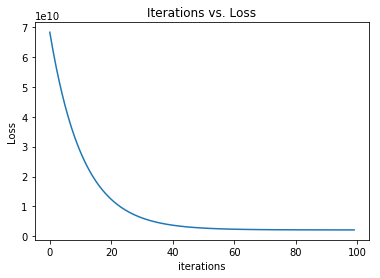

In [118]:
fig, ax = plt.subplots()
ax.plot(lossdata[:100]) # First 100 iterations
ax.set(xlabel='iterations', ylabel='Loss',
       title='Iterations vs. Loss')
plt.show()